NameError: name 'spark' is not defined

In [2]:
from pyspark import SparkConf, SparkContext, SQLContext

conf = SparkConf().setAppName("test").setMaster("local")
sc = SparkContext(conf=conf)
sqlContext = SQLContext(sc)
print(sc)
print(sqlContext)

<SparkContext master=local appName=test>


In [3]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("test").config("spark.sql.broadcastTimeout", "3600000000").getOrCreate()

In [1]:
spark.sparkContext.getConf().get('spark.driver.memory')

NameError: name 'spark' is not defined

# Initialising the Spark session
spark.sparkContext.getConf().get('spark.driver.memory')

In [7]:
# check the libraries in already installed on the cluster 
spark.sparkContext.list_packages()

AttributeError: 'SparkContext' object has no attribute 'list_packages'

In [5]:
# Data stored in Public S3 Bucket 'chicago-crime-mlc' as 'Chicago_Crimes_2012_to_2017.csv'
df = spark.read.csv('s3://tdronitaaws/2019-Oct (1).csv', header = True, inferSchema = False)

In [6]:
from pyspark.sql.functions import col

df = df.where(col("brand").isNotNull())


df = df.where(col("category_code").isNotNull())

df = df.where(col("user_session").isNotNull())

In [7]:
from pyspark.sql.functions import col, countDistinct
from pyspark.sql.functions import when, count, col, isnull
import pyspark.sql.functions as F
from pyspark.sql.types import FloatType

df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).show()

+----------+----------+----------+-----------+-------------+-----+-----+-------+------------+
|event_time|event_type|product_id|category_id|category_code|brand|price|user_id|user_session|
+----------+----------+----------+-----------+-------------+-----+-----+-------+------------+
|         0|         0|         0|          0|            0|    0|    0|      0|           0|
+----------+----------+----------+-----------+-------------+-----+-----+-------+------------+



In [422]:
# Number of rows and columns in the dataset
print((df.count(), len(df.columns)))

(26560620, 9)


In [209]:
# Printing the first two row
df.head(2)

[Row(event_time='2019-10-01 00:00:00 UTC', event_type='view', product_id='3900821', category_id='2053013552326770905', category_code='appliances.environment.water_heater', brand='aqua', price='33.20', user_id='554748717', user_session='9333dfbd-b87a-4708-9857-6336556b0fcc'),
 Row(event_time='2019-10-01 00:00:01 UTC', event_type='view', product_id='1307067', category_id='2053013558920217191', category_code='computers.notebook', brand='lenovo', price='251.74', user_id='550050854', user_session='7c90fc70-0e80-4590-96f3-13c02c18c713')]

In [210]:
df.show(5)

+--------------------+----------+----------+-------------------+--------------------+------+-------+---------+--------------------+
|          event_time|event_type|product_id|        category_id|       category_code| brand|  price|  user_id|        user_session|
+--------------------+----------+----------+-------------------+--------------------+------+-------+---------+--------------------+
|2019-10-01 00:00:...|      view|   3900821|2053013552326770905|appliances.enviro...|  aqua|  33.20|554748717|9333dfbd-b87a-470...|
|2019-10-01 00:00:...|      view|   1307067|2053013558920217191|  computers.notebook|lenovo| 251.74|550050854|7c90fc70-0e80-459...|
|2019-10-01 00:00:...|      view|   1004237|2053013555631882655|electronics.smart...| apple|1081.98|535871217|c6bd7419-2748-4c5...|
|2019-10-01 00:00:...|      view|   1480613|2053013561092866779|   computers.desktop|pulser| 908.62|512742880|0d0d91c2-c9c2-4e8...|
|2019-10-01 00:00:...|      view|  28719074|2053013565480109009|  apparel.sh

In [478]:
df.columns

['event_time',
 'event_type',
 'product_id',
 'category_id',
 'category_code',
 'brand',
 'price',
 'user_id',
 'user_session']

In [212]:
#Data exploration and cleaning

df.select("event_time").show(10, truncate = False)

+-----------------------+
|event_time             |
+-----------------------+
|2019-10-01 00:00:00 UTC|
|2019-10-01 00:00:01 UTC|
|2019-10-01 00:00:04 UTC|
|2019-10-01 00:00:05 UTC|
|2019-10-01 00:00:10 UTC|
|2019-10-01 00:00:11 UTC|
|2019-10-01 00:00:11 UTC|
|2019-10-01 00:00:11 UTC|
|2019-10-01 00:00:13 UTC|
|2019-10-01 00:00:16 UTC|
+-----------------------+
only showing top 10 rows



In [213]:
df.select("event_time").dtypes

[('event_time', 'string')]

In [8]:
# create a time stamp column "Date_time"

from pyspark.sql.functions import to_timestamp

df = df.withColumn("Date_time", to_timestamp("event_time"))

In [215]:
df.show(5)

+--------------------+----------+----------+-------------------+--------------------+------+-------+---------+--------------------+-------------------+
|          event_time|event_type|product_id|        category_id|       category_code| brand|  price|  user_id|        user_session|          Date_time|
+--------------------+----------+----------+-------------------+--------------------+------+-------+---------+--------------------+-------------------+
|2019-10-01 00:00:...|      view|   3900821|2053013552326770905|appliances.enviro...|  aqua|  33.20|554748717|9333dfbd-b87a-470...|2019-10-01 05:30:00|
|2019-10-01 00:00:...|      view|   1307067|2053013558920217191|  computers.notebook|lenovo| 251.74|550050854|7c90fc70-0e80-459...|2019-10-01 05:30:01|
|2019-10-01 00:00:...|      view|   1004237|2053013555631882655|electronics.smart...| apple|1081.98|535871217|c6bd7419-2748-4c5...|2019-10-01 05:30:04|
|2019-10-01 00:00:...|      view|   1480613|2053013561092866779|   computers.desktop|pul

In [9]:
#Extracting hour from the data set


from pyspark.sql.functions import hour

df =df.withColumn("hour", hour(df["Date_time"]))

In [10]:
from pyspark.sql.functions import dayofweek

df =df.withColumn("day_of_week", dayofweek(df["Date_time"]))

In [222]:
df.show(4)

+----------+----------+-------------------+--------------------+------+-------+---------+--------------------+----+-----------+
|event_type|product_id|        category_id|       category_code| brand|  price|  user_id|        user_session|hour|day_of_week|
+----------+----------+-------------------+--------------------+------+-------+---------+--------------------+----+-----------+
|      view|   3900821|2053013552326770905|appliances.enviro...|  aqua|  33.20|554748717|9333dfbd-b87a-470...|   5|          3|
|      view|   1307067|2053013558920217191|  computers.notebook|lenovo| 251.74|550050854|7c90fc70-0e80-459...|   5|          3|
|      view|   1004237|2053013555631882655|electronics.smart...| apple|1081.98|535871217|c6bd7419-2748-4c5...|   5|          3|
|      view|   1480613|2053013561092866779|   computers.desktop|pulser| 908.62|512742880|0d0d91c2-c9c2-4e8...|   5|          3|
+----------+----------+-------------------+--------------------+------+-------+---------+---------------

In [11]:
df = df.drop('event_time','Date_time')

In [221]:
df.show(4)

+----------+----------+-------------------+--------------------+------+-------+---------+--------------------+----+-----------+
|event_type|product_id|        category_id|       category_code| brand|  price|  user_id|        user_session|hour|day_of_week|
+----------+----------+-------------------+--------------------+------+-------+---------+--------------------+----+-----------+
|      view|   3900821|2053013552326770905|appliances.enviro...|  aqua|  33.20|554748717|9333dfbd-b87a-470...|   5|          3|
|      view|   1307067|2053013558920217191|  computers.notebook|lenovo| 251.74|550050854|7c90fc70-0e80-459...|   5|          3|
|      view|   1004237|2053013555631882655|electronics.smart...| apple|1081.98|535871217|c6bd7419-2748-4c5...|   5|          3|
|      view|   1480613|2053013561092866779|   computers.desktop|pulser| 908.62|512742880|0d0d91c2-c9c2-4e8...|   5|          3|
+----------+----------+-------------------+--------------------+------+-------+---------+---------------

In [12]:
hour_df = df.groupBy('hour').count().orderBy('count',ascending= False).toPandas()

In [ ]:
hour_df.head(10)

In [13]:
#import matplotlib
import matplotlib.pyplot as plt


UsageError: Line magic function `%matplot` not found.


<Figure size 1008x720 with 0 Axes>

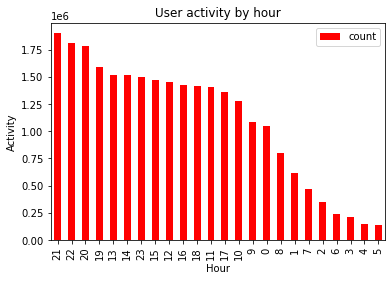

In [14]:
# create the plot 
plt.figure(figsize=(14,10))
#plot view data for hour

hour_df.plot(x='hour' , y='count', kind ='bar' , color ='red')
plt.title('User activity by hour')
plt.ylabel('Activity')
plt.xlabel('Hour')

#display the plot
%matplot plt



In [15]:
day_of_week = df.groupBy('day_of_week').count().orderBy('count',ascending= False).toPandas()

In [ ]:
day_of_week.head(10)

UsageError: Line magic function `%matplot` not found.


<Figure size 1008x720 with 0 Axes>

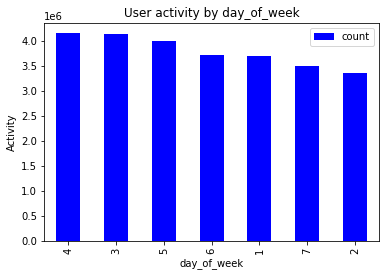

In [16]:
#import matplotlib
import matplotlib.pyplot as plt
# create the plot 
plt.figure(figsize=(14,10))
#plot view data for hour

day_of_week.plot(x='day_of_week' , y='count', kind ='bar' , color ='blue')
plt.title('User activity by day_of_week')
plt.ylabel('Activity')
plt.xlabel('day_of_week')

#display the plot
%matplot plt




In [484]:

df.select('product_id').distinct().show(2)

+----------+
|product_id|
+----------+
|   1306639|
|   1306571|
+----------+
only showing top 2 rows



In [485]:
prod_id = df.groupBy('product_id').count().orderBy('count',ascending= False).toPandas()

In [486]:
prod_id.head()

,product_id,count
0,1004856,500354
1,1004767,438231
2,1005115,355786
3,1004833,237545
4,1004249,231070


In [487]:
brand = df.groupBy('brand').count().orderBy('count',ascending= False).toPandas()

In [488]:
brand.head()

,brand,count
0,samsung,5158902
1,apple,4092652
2,xiaomi,2697644
3,huawei,1092346
4,lg,508999


In [489]:
category_code = df.groupBy('category_code').count().orderBy('count',ascending= False).toPandas()

In [490]:
category_code.head(10)

,category_code,count
0,electronics.smartphone,11485320
1,electronics.clocks,1132207
2,computers.notebook,1131269
3,electronics.video.tv,1112047
4,electronics.audio.headphone,1092952
5,appliances.kitchen.washer,860417
6,appliances.environment.vacuum,778587
7,appliances.kitchen.refrigerators,712119
8,apparel.shoes,604625
9,computers.desktop,403070


In [491]:
from pyspark.sql.functions import col, countDistinct

df.agg(countDistinct(df.user_id).alias('c')).collect()

[Row(c=2323036)]

In [493]:
user_id = df.groupBy('user_id').count().orderBy('count',ascending= False).toPandas()

KeyboardInterrupt: 

In [ ]:
user_id.head(5)

In [17]:
from pyspark.sql.functions import col, avg,max

df.filter(df['category_code'] == 'electronics.smartphone').filter(df['event_type'] == 'purchase').agg(avg(col("price"))).collect()

[Row(avg(price)=464.32835944604653)]

In [18]:
df.filter(df['category_code'] == 'electronics.smartphone').filter(df['event_type'] == 'purchase').agg(max(col("price"))).collect()

[Row(max(price)='999.77')]

In [19]:
event_type = df.groupBy('event_type').count().orderBy('count',ascending= False).toPandas()

In [ ]:
event_type .head(20)

UsageError: Line magic function `%matplot` not found.


<Figure size 1008x720 with 0 Axes>

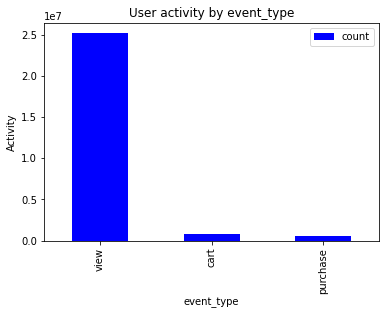

In [20]:
#import matplotlib
import matplotlib.pyplot as plt
# create the plot 
plt.figure(figsize=(14,10))
#plot view data for hour

event_type.plot(x='event_type' , y='count', kind ='bar' , color ='blue')
plt.title('User activity by event_type')
plt.ylabel('Activity')
plt.xlabel('event_type')

#display the plot
%matplot plt




In [21]:

from pyspark.sql.functions import substring_index
df =df.withColumn("category1", substring_index(df.category_code, '.', 1))


In [22]:
df = df.drop('category2','category3')

In [23]:
df =df.withColumn("category3", substring_index(df.category_code, '.', 2))

In [228]:
df.show()

+----------+----------+-------------------+--------------------+--------+-------+---------+--------------------+----+-----------+-----------+--------------------+
|event_type|product_id|        category_id|       category_code|   brand|  price|  user_id|        user_session|hour|day_of_week|  category1|           category3|
+----------+----------+-------------------+--------------------+--------+-------+---------+--------------------+----+-----------+-----------+--------------------+
|      view|   3900821|2053013552326770905|appliances.enviro...|    aqua|  33.20|554748717|9333dfbd-b87a-470...|   5|          3| appliances|appliances.enviro...|
|      view|   1307067|2053013558920217191|  computers.notebook|  lenovo| 251.74|550050854|7c90fc70-0e80-459...|   5|          3|  computers|  computers.notebook|
|      view|   1004237|2053013555631882655|electronics.smart...|   apple|1081.98|535871217|c6bd7419-2748-4c5...|   5|          3|electronics|electronics.smart...|
|      view|   1480613

In [24]:
df =df.withColumn("category2", substring_index(df.category3, '.', -1))

In [230]:
df.show()

+----------+----------+-------------------+--------------------+--------+-------+---------+--------------------+----+-----------+-----------+--------------------+-----------+
|event_type|product_id|        category_id|       category_code|   brand|  price|  user_id|        user_session|hour|day_of_week|  category1|           category3|  category2|
+----------+----------+-------------------+--------------------+--------+-------+---------+--------------------+----+-----------+-----------+--------------------+-----------+
|      view|   3900821|2053013552326770905|appliances.enviro...|    aqua|  33.20|554748717|9333dfbd-b87a-470...|   5|          3| appliances|appliances.enviro...|environment|
|      view|   1307067|2053013558920217191|  computers.notebook|  lenovo| 251.74|550050854|7c90fc70-0e80-459...|   5|          3|  computers|  computers.notebook|   notebook|
|      view|   1004237|2053013555631882655|electronics.smart...|   apple|1081.98|535871217|c6bd7419-2748-4c5...|   5|        

In [25]:
df = df.drop('category3')

In [102]:
event_type.head(20)

,event_type,count
0,view,30096
1,purchase,551
2,cart,528


In [31]:
from pyspark.sql.functions import col, countDistinct
Session = df.select('user_id','user_session').distinct()

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:51131)
Traceback (most recent call last):
  File "/Users/tanushdey/opt/anaconda3/lib/python3.8/site-packages/py4j/java_gateway.py", line 982, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/tanushdey/opt/anaconda3/lib/python3.8/site-packages/py4j/java_gateway.py", line 1120, in start
    self.socket.connect((self.address, self.port))
ConnectionRefusedError: [Errno 61] Connection refused


Py4JNetworkError: An error occurred while trying to connect to the Java server (127.0.0.1:51131)

In [30]:
Session.groupBy('user_session').count().orderBy('count',ascending= False).toPandas()

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:51131)
Traceback (most recent call last):
  File "/Users/tanushdey/opt/anaconda3/lib/python3.8/site-packages/py4j/java_gateway.py", line 982, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/tanushdey/opt/anaconda3/lib/python3.8/site-packages/py4j/java_gateway.py", line 1120, in start
    self.socket.connect((self.address, self.port))
ConnectionRefusedError: [Errno 61] Connection refused


Py4JNetworkError: An error occurred while trying to connect to the Java server (127.0.0.1:51131)

In [114]:
product_id = df.select('user_id','product_id').distinct()

In [119]:
product_id.groupBy('product_id').count().orderBy('count',ascending= False).toPandas()

,product_id,count
0,1005115,316
1,1004856,299
2,1004767,239
3,1005105,196
4,1004870,169
...,...,...
6208,1003713,1
6209,3601486,1
6210,3701329,1
6211,28714289,1


In [116]:
category2 = df.select('user_id','category2').distinct()

In [120]:
category2.groupBy('category2').count().orderBy('count',ascending= False).toPandas()

,category2,count
0,smartphone,3584
1,kitchen,807
2,audio,531
3,clocks,421
4,environment,370
5,shoes,308
6,notebook,289
7,accessories,288
8,video,278
9,tools,211


In [121]:
from pyspark.sql.functions import col, avg,max

df.filter(df['event_type'] == 'purchase').agg(avg(col("price"))).collect()

[Row(avg(price)=342.4241742286753)]

In [124]:
df.dtypes

[('event_type', 'string'),
 ('product_id', 'string'),
 ('category_id', 'string'),
 ('category_code', 'string'),
 ('brand', 'string'),
 ('price', 'string'),
 ('user_id', 'string'),
 ('user_session', 'string'),
 ('hour', 'int'),
 ('day_of_week', 'int'),
 ('category1', 'string'),
 ('category2', 'string')]

In [431]:
df = df.withColumn("PRICE", df['price'].cast('float'))

In [432]:
df.dtypes

[('event_type', 'string'),
 ('product_id', 'string'),
 ('category_id', 'string'),
 ('category_code', 'string'),
 ('brand', 'string'),
 ('PRICE', 'float'),
 ('user_id', 'string'),
 ('user_session', 'string'),
 ('hour', 'int'),
 ('category1', 'string'),
 ('category2', 'string')]

In [132]:
 category1 = df.select('category1','PRICE').filter((df['event_type'] == 'purchase'))

In [133]:
category1.groupBy('category1').avg('PRICE').toPandas()

,category1,avg(PRICE)
0,electronics,386.035475
1,furniture,88.336667
2,appliances,140.725538
3,auto,112.754003
4,computers,425.659617
5,apparel,63.703334
6,construction,30.974999
7,accessories,89.578000
8,stationery,7.700000
9,kids,21.642500


In [134]:
df.show()

+----------+----------+-------------------+--------------------+--------+-------+---------+--------------------+----+-----------+-----------+-----------+
|event_type|product_id|        category_id|       category_code|   brand|  PRICE|  user_id|        user_session|hour|day_of_week|  category1|  category2|
+----------+----------+-------------------+--------------------+--------+-------+---------+--------------------+----+-----------+-----------+-----------+
|      view|   3900821|2053013552326770905|appliances.enviro...|    aqua|   33.2|554748717|9333dfbd-b87a-470...|   5|          3| appliances|environment|
|      view|   1307067|2053013558920217191|  computers.notebook|  lenovo| 251.74|550050854|7c90fc70-0e80-459...|   5|          3|  computers|   notebook|
|      view|   1004237|2053013555631882655|electronics.smart...|   apple|1081.98|535871217|c6bd7419-2748-4c5...|   5|          3|electronics| smartphone|
|      view|   1480613|2053013561092866779|   computers.desktop|  pulser| 90

In [136]:
df.select('hour').distinct().collect()

[Row(hour=5), Row(hour=6), Row(hour=7), Row(hour=8), Row(hour=9)]

In [433]:
from pyspark.sql.functions import when
df = df.withColumn("bin_time", when((df['hour']> 0) &  (df['hour']<= 6)  , 1).
                  when((df['hour']> 6) &  (df['hour']<= 12)  , 2).
                  when((df['hour']> 12) &  (df['hour']<= 18)  , 3).
                  when((df['hour']> 18) &  (df['hour']<= 24)  , 4))

In [236]:
df.show(5)

+----------+----------+-------------------+--------------------+------+-------+---------+--------------------+----+-----------+-----------+-----------+--------+
|event_type|product_id|        category_id|       category_code| brand|  PRICE|  user_id|        user_session|hour|day_of_week|  category1|  category2|bin_time|
+----------+----------+-------------------+--------------------+------+-------+---------+--------------------+----+-----------+-----------+-----------+--------+
|      view|   3900821|2053013552326770905|appliances.enviro...|  aqua|   33.2|554748717|9333dfbd-b87a-470...|   5|          3| appliances|environment|       1|
|      view|   1307067|2053013558920217191|  computers.notebook|lenovo| 251.74|550050854|7c90fc70-0e80-459...|   5|          3|  computers|   notebook|       1|
|      view|   1004237|2053013555631882655|electronics.smart...| apple|1081.98|535871217|c6bd7419-2748-4c5...|   5|          3|electronics| smartphone|       1|
|      view|   1480613|20530135610

In [237]:
df.select('brand').distinct().collect()

[Row(brand='aqua'),
 Row(brand='lenovo'),
 Row(brand='apple'),
 Row(brand='pulser'),
 Row(brand='baden'),
 Row(brand='huawei'),
 Row(brand='elenberg'),
 Row(brand='samsung'),
 Row(brand='haier'),
 Row(brand='brw'),
 Row(brand='bosch'),
 Row(brand='hp'),
 Row(brand='jbl'),
 Row(brand='xiaomi'),
 Row(brand='midea'),
 Row(brand='ariston'),
 Row(brand='respect'),
 Row(brand='dauscher'),
 Row(brand='atlant'),
 Row(brand='burgerschuhe'),
 Row(brand='hotpoint-ariston'),
 Row(brand='gorenje'),
 Row(brand='acer'),
 Row(brand='sony'),
 Row(brand='teploross'),
 Row(brand='panasonic'),
 Row(brand='leo'),
 Row(brand='lg'),
 Row(brand='nokia'),
 Row(brand='strobbs'),
 Row(brand='artel'),
 Row(brand='oasis'),
 Row(brand='redmond'),
 Row(brand='caprice'),
 Row(brand='nexpero'),
 Row(brand='oneplus'),
 Row(brand='casio'),
 Row(brand='indesit'),
 Row(brand='oppo'),
 Row(brand='fila'),
 Row(brand='fassen'),
 Row(brand='ballu'),
 Row(brand='garmin'),
 Row(brand='gigabyte'),
 Row(brand='ava'),
 Row(brand='

In [434]:
df2 = df.groupBy('brand').count().orderBy('count',ascending= False).collect()

In [436]:
df2 = spark.createDataFrame(df2)

In [437]:
df2 = df2.withColumnRenamed("brand", "brand2")

TypeError: data is already a DataFrame

In [259]:
#df3 = df.groupBy('brand').count().orderBy('count',ascending= False).collect()

In [438]:
df = df.join(df2,df.brand ==  df2.brand2,"inner") \
     .show(truncate=False)

+----------+----------+-------------------+---------------------------+-------+------+---------+------------------------------------+----+-----------+---------+--------+-------+-----+
|event_type|product_id|category_id        |category_code              |brand  |PRICE |user_id  |user_session                        |hour|category1  |category2|bin_time|brand2 |count|
+----------+----------+-------------------+---------------------------+-------+------+---------+------------------------------------+----+-----------+---------+--------+-------+-----+
|view      |11600092  |2053013554566529381|computers.desktop          |edifier|22.88 |512367362|a561f062-442b-4343-86b6-5fa622f7187b|9   |computers  |desktop  |2       |edifier|2116 |
|view      |11600092  |2053013554566529381|computers.desktop          |edifier|22.88 |512367362|a561f062-442b-4343-86b6-5fa622f7187b|9   |computers  |desktop  |2       |edifier|2116 |
|view      |11600315  |2053013554566529381|computers.desktop          |edifier|6

In [267]:
type(df3)

list

In [268]:
df2.show()

+--------+-----+
|   brand|count|
+--------+-----+
| samsung| 5868|
|   apple| 4608|
|  xiaomi| 3151|
|  huawei| 1342|
|      lg|  498|
|    acer|  455|
|   bosch|  449|
|      hp|  434|
|  lenovo|  431|
|    oppo|  393|
|elenberg|  385|
|   casio|  348|
|   nokia|  335|
| redmond|  281|
|   artel|  279|
| respect|  267|
|    sony|  255|
|dauscher|  252|
|    asus|  245|
|    vivo|  242|
+--------+-----+
only showing top 20 rows



In [269]:
df2 = df2.withColumnRenamed("brand", "brand2")

In [270]:
df2.show()

+--------+-----+
|  brand2|count|
+--------+-----+
| samsung| 5868|
|   apple| 4608|
|  xiaomi| 3151|
|  huawei| 1342|
|      lg|  498|
|    acer|  455|
|   bosch|  449|
|      hp|  434|
|  lenovo|  431|
|    oppo|  393|
|elenberg|  385|
|   casio|  348|
|   nokia|  335|
| redmond|  281|
|   artel|  279|
| respect|  267|
|    sony|  255|
|dauscher|  252|
|    asus|  245|
|    vivo|  242|
+--------+-----+
only showing top 20 rows



In [442]:
df4 = df.join(df2,df.brand ==  df2.brand2,"inner")

AttributeError: 'NoneType' object has no attribute 'dtypes'

In [440]:
type(df2)

pyspark.sql.dataframe.DataFrame

In [276]:
df4.select([count(when(isnull(c), c)).alias(c) for c in df4.columns]).show()

+----------+----------+-----------+-------------+-----+-----+-------+------------+----+-----------+---------+---------+--------+------+-----+
|event_type|product_id|category_id|category_code|brand|PRICE|user_id|user_session|hour|day_of_week|category1|category2|bin_time|brand2|count|
+----------+----------+-----------+-------------+-----+-----+-------+------------+----+-----------+---------+---------+--------+------+-----+
|         0|         0|          0|            0|    0|    0|      0|           0|   0|          0|        0|        0|       0|     0|    0|
+----------+----------+-----------+-------------+-----+-----+-------+------------+----+-----------+---------+---------+--------+------+-----+



In [279]:
from pyspark.sql.functions import when
df4 = df4.withColumn("brandshrink", when((df4['count']> 242)   , 'OTHERS').
                     otherwise(df4['brand2']))

In [280]:
df4.dtypes

[('event_type', 'string'),
 ('product_id', 'string'),
 ('category_id', 'string'),
 ('category_code', 'string'),
 ('brand', 'string'),
 ('PRICE', 'float'),
 ('user_id', 'string'),
 ('user_session', 'string'),
 ('hour', 'int'),
 ('day_of_week', 'int'),
 ('category1', 'string'),
 ('category2', 'string'),
 ('bin_time', 'int'),
 ('brand2', 'string'),
 ('count', 'bigint'),
 ('brandshrink', 'string')]

In [ ]:
df4.select

In [204]:
df.head(5)

AttributeError: 'NoneType' object has no attribute 'head'

In [281]:
df5 = df4.filter((df['event_type'] == 'cart'))

In [283]:
type(df5)

pyspark.sql.dataframe.DataFrame

In [294]:
df6 = df4.select('product_id','user_id').filter((df['event_type'] == 'purchase'))

In [285]:
type(df6)

pyspark.sql.dataframe.DataFrame

In [295]:
df6.columns

['product_id', 'user_id']

In [296]:
df6 = df6.withColumnRenamed("product_id", "product_id2")

In [297]:
df6 = df6.withColumnRenamed("user_id", "user_id2")

In [298]:
type(df6)

pyspark.sql.dataframe.DataFrame

In [299]:
df7 = df5.join(df6,(df5.product_id ==  df6.product_id2) & (df5.user_id ==  df6.user_id2) ,"left")

In [300]:
print((df7.count(), len(df7.columns)))

(1161, 18)


In [301]:
df7.show()

+----------+----------+-------------------+--------------------+-------+-------+---------+--------------------+----+-----------+-----------+----------+--------+-------+-----+-----------+-----------+---------+
|event_type|product_id|        category_id|       category_code|  brand|  PRICE|  user_id|        user_session|hour|day_of_week|  category1| category2|bin_time| brand2|count|brandshrink|product_id2| user_id2|
+----------+----------+-------------------+--------------------+-------+-------+---------+--------------------+----+-----------+-----------+----------+--------+-------+-----+-----------+-----------+---------+
|      cart|   1004230|2053013555631882655|electronics.smart...|  apple|1145.33|555287219|d354cf9a-ae2c-458...|   8|          3|electronics|smartphone|       2|  apple| 4608|     OTHERS|       null|     null|
|      cart|   1004741|2053013555631882655|electronics.smart...| xiaomi| 185.71|522877326|5fa4388c-3bf7-4a6...|   9|          3|electronics|smartphone|       2| xia

In [306]:
from pyspark.sql.functions import when
df7 = df7.withColumn("is_purchased", when((df7['product_id2'].isNull() ) &  (df7['user_id2'].isNull() )  , 0).
                  otherwise(1))

In [307]:
type(df7)

pyspark.sql.dataframe.DataFrame

In [308]:
df7.show()

+----------+----------+-------------------+--------------------+-------+-------+---------+--------------------+----+-----------+-----------+----------+--------+-------+-----+-----------+-----------+---------+------------+
|event_type|product_id|        category_id|       category_code|  brand|  PRICE|  user_id|        user_session|hour|day_of_week|  category1| category2|bin_time| brand2|count|brandshrink|product_id2| user_id2|is_purchased|
+----------+----------+-------------------+--------------------+-------+-------+---------+--------------------+----+-----------+-----------+----------+--------+-------+-----+-----------+-----------+---------+------------+
|      cart|   1004230|2053013555631882655|electronics.smart...|  apple|1145.33|555287219|d354cf9a-ae2c-458...|   8|          3|electronics|smartphone|       2|  apple| 4608|     OTHERS|       null|     null|           0|
|      cart|   1004741|2053013555631882655|electronics.smart...| xiaomi| 185.71|522877326|5fa4388c-3bf7-4a6...| 

In [309]:
df7.show()

+----------+----------+-------------------+--------------------+-------+-------+---------+--------------------+----+-----------+-----------+----------+--------+-------+-----+-----------+-----------+---------+------------+
|event_type|product_id|        category_id|       category_code|  brand|  PRICE|  user_id|        user_session|hour|day_of_week|  category1| category2|bin_time| brand2|count|brandshrink|product_id2| user_id2|is_purchased|
+----------+----------+-------------------+--------------------+-------+-------+---------+--------------------+----+-----------+-----------+----------+--------+-------+-----+-----------+-----------+---------+------------+
|      cart|   1004230|2053013555631882655|electronics.smart...|  apple|1145.33|555287219|d354cf9a-ae2c-458...|   8|          3|electronics|smartphone|       2|  apple| 4608|     OTHERS|       null|     null|           0|
|      cart|   1004741|2053013555631882655|electronics.smart...| xiaomi| 185.71|522877326|5fa4388c-3bf7-4a6...| 

In [310]:
#check nulls


df7.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).show()

+----------+----------+-----------+-------------+-----+-----+-------+------------+----+-----------+---------+---------+--------+
|event_type|product_id|category_id|category_code|brand|PRICE|user_id|user_session|hour|day_of_week|category1|category2|bin_time|
+----------+----------+-----------+-------------+-----+-----+-------+------------+----+-----------+---------+---------+--------+
|         0|         0|          0|            0|    0|    0|      0|           0|   0|          0|        0|        0|       0|
+----------+----------+-----------+-------------+-----+-----+-------+------------+----+-----------+---------+---------+--------+



In [312]:
print((df7.count(), len(df7.columns)))

(1161, 19)


In [313]:
df8 = df7

In [314]:
type(df8)

pyspark.sql.dataframe.DataFrame

In [315]:
df7 = df7.drop('category_id','category_code','user_id2','product_id2','hour','brand2')

In [316]:
df7.show(2)

+----------+----------+------+-------+---------+--------------------+-----------+-----------+----------+--------+-----+-----------+------------+
|event_type|product_id| brand|  PRICE|  user_id|        user_session|day_of_week|  category1| category2|bin_time|count|brandshrink|is_purchased|
+----------+----------+------+-------+---------+--------------------+-----------+-----------+----------+--------+-----+-----------+------------+
|      cart|   1004230| apple|1145.33|555287219|d354cf9a-ae2c-458...|          3|electronics|smartphone|       2| 4608|     OTHERS|           0|
|      cart|   1004741|xiaomi| 185.71|522877326|5fa4388c-3bf7-4a6...|          3|electronics|smartphone|       2| 3151|     OTHERS|           0|
+----------+----------+------+-------+---------+--------------------+-----------+-----------+----------+--------+-----+-----------+------------+
only showing top 2 rows



In [320]:
df7 = df7.withColumn("brandshrink2", when((df7['count']< '242')   , 'OTHERS').
                     otherwise(df7['brand']))

In [374]:
df7 = df7.drop('brandshrink','event_type','day_of_week','count')

In [358]:
df7.show(2)

+----------+-------+-----------+-----------+----------+--------+-----+------------+----------------+
|product_id|  PRICE|day_of_week|  category1| category2|bin_time|count|brandshrink2|is_purchased_str|
+----------+-------+-----------+-----------+----------+--------+-----+------------+----------------+
|   1004230|1145.33|          3|electronics|smartphone|       2| 4608|       apple|               0|
|   1004741| 185.71|          3|electronics|smartphone|       2| 3151|      xiaomi|               0|
+----------+-------+-----------+-----------+----------+--------+-----+------------+----------------+
only showing top 2 rows



In [327]:
df7 = df7.drop('brand','user_id','user_session')

In [328]:
df7.select([count(when(isnull(c), c)).alias(c) for c in df7.columns]).show()

+----------+----------+-----+-----------+---------+---------+--------+-----+------------+------------+
|event_type|product_id|PRICE|day_of_week|category1|category2|bin_time|count|is_purchased|brandshrink2|
+----------+----------+-----+-----------+---------+---------+--------+-----+------------+------------+
|         0|         0|    0|          0|        0|        0|       0|    0|           0|           0|
+----------+----------+-----+-----------+---------+---------+--------+-----+------------+------------+



In [375]:
categorical_features = ['product_id' ,'category1','category2','bin_time','brandshrink2']

continuous_features =['PRICE']




In [376]:
#Spark pipeline

from pyspark.ml.feature import OneHotEncoder, StringIndexer , VectorAssembler

stages =[ ]

In [377]:
#String Indexer  and OneHotEncoder

for categoricalCol in categorical_features:
    stringIndexer = StringIndexer(inputCol =categoricalCol , outputCol = categoricalCol + '_Index' )
    encoder = OneHotEncoder(inputCols = [stringIndexer.getOutputCol()] , outputCols = [categoricalCol + '_encoded'])
    stages +=[stringIndexer,encoder ]






In [378]:
df7.dtypes

[('product_id', 'string'),
 ('PRICE', 'float'),
 ('category1', 'string'),
 ('category2', 'string'),
 ('bin_time', 'int'),
 ('brandshrink2', 'string'),
 ('is_purchased_str', 'string')]

In [345]:
from pyspark.sql.types import IntegerType,BooleanType,StringType

df7 = df7.withColumn("is_purchased_str", df7['is_purchased'].cast(StringType()))

In [346]:
df7.dtypes

[('event_type', 'string'),
 ('product_id', 'string'),
 ('PRICE', 'float'),
 ('day_of_week', 'int'),
 ('category1', 'string'),
 ('category2', 'string'),
 ('bin_time', 'int'),
 ('count', 'bigint'),
 ('is_purchased', 'int'),
 ('brandshrink2', 'string'),
 ('is_purchased_str', 'string')]

In [347]:
df7 = df7.drop('is_purchased')

In [379]:
#encoding target variable

label_stringIndx = StringIndexer(inputCol ='is_purchased_str' , outputCol = 'label' )

stages += [label_stringIndx]

In [380]:
stages

[StringIndexer_ee4fd732bac6,
 OneHotEncoder_3f7a6b28285d,
 StringIndexer_cce5d1f5ed96,
 OneHotEncoder_dae5c50d0692,
 StringIndexer_f20b6bb21ef4,
 OneHotEncoder_da6887a0e0db,
 StringIndexer_b207ad488721,
 OneHotEncoder_27a7608210f1,
 StringIndexer_e395d3638dee,
 OneHotEncoder_76f7d25b375e,
 StringIndexer_ba0ac845a097]

In [381]:
#vector Assemble

assemblerInputs = [c +"_encoded" for c in categorical_features] + continuous_features

assembler = VectorAssembler(inputCols = assemblerInputs , outputCol = "features" )

stages += [assembler]

In [382]:
stages

[StringIndexer_ee4fd732bac6,
 OneHotEncoder_3f7a6b28285d,
 StringIndexer_cce5d1f5ed96,
 OneHotEncoder_dae5c50d0692,
 StringIndexer_f20b6bb21ef4,
 OneHotEncoder_da6887a0e0db,
 StringIndexer_b207ad488721,
 OneHotEncoder_27a7608210f1,
 StringIndexer_e395d3638dee,
 OneHotEncoder_76f7d25b375e,
 StringIndexer_ba0ac845a097,
 VectorAssembler_c03cea389863]

In [383]:
#LOADING ALL STEPS IN THE PIPELINE

from pyspark.ml import Pipeline

pipeline = Pipeline(stages = stages)

pipeline

Pipeline_60d6e03e7204

In [384]:
pipelineModel = pipeline.fit(df7)

In [385]:
df7 = pipelineModel.transform(df7)

In [386]:
df7.show(5)

+----------+-------+-----------+----------+--------+------------+----------------+----------------+------------------+---------------+-----------------+---------------+-----------------+--------------+----------------+------------------+--------------------+-----+--------------------+
|product_id|  PRICE|  category1| category2|bin_time|brandshrink2|is_purchased_str|product_id_Index|product_id_encoded|category1_Index|category1_encoded|category2_Index|category2_encoded|bin_time_Index|bin_time_encoded|brandshrink2_Index|brandshrink2_encoded|label|            features|
+----------+-------+-----------+----------+--------+------------+----------------+----------------+------------------+---------------+-----------------+---------------+-----------------+--------------+----------------+------------------+--------------------+-----+--------------------+
|   1004230|1145.33|electronics|smartphone|       2|       apple|               0|            85.0|  (152,[85],[1.0])|            0.0|    (6,[

In [387]:
df7.printSchema()

root
 |-- product_id: string (nullable = true)
 |-- PRICE: float (nullable = true)
 |-- category1: string (nullable = true)
 |-- category2: string (nullable = true)
 |-- bin_time: integer (nullable = true)
 |-- brandshrink2: string (nullable = true)
 |-- is_purchased_str: string (nullable = false)
 |-- product_id_Index: double (nullable = false)
 |-- product_id_encoded: vector (nullable = true)
 |-- category1_Index: double (nullable = false)
 |-- category1_encoded: vector (nullable = true)
 |-- category2_Index: double (nullable = false)
 |-- category2_encoded: vector (nullable = true)
 |-- bin_time_Index: double (nullable = false)
 |-- bin_time_encoded: vector (nullable = true)
 |-- brandshrink2_Index: double (nullable = false)
 |-- brandshrink2_encoded: vector (nullable = true)
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)



In [388]:
df7.groupBy("label").count().orderBy('count', ascending= False).show()

+-----+-----+
|label|count|
+-----+-----+
|  0.0|  965|
|  1.0|  196|
+-----+-----+



In [389]:
train , test = df7.randomSplit([0.7,0.3], seed =100)

In [390]:
train.count()

802

In [391]:
test.count()

359

In [395]:
#from pyspark.ml.classification import RandomForestClassifer
from pyspark.ml.classification import RandomForestClassifier

In [397]:
rf = RandomForestClassifier( featuresCol = 'features' , labelCol ='label', maxDepth =5, impurity ='gini', numTrees =25, seed=100)

In [398]:
rfmodel = rf.fit(train)

In [400]:
print(rfmodel.toDebugString)

RandomForestClassificationModel: uid=RandomForestClassifier_fb203363240b, numTrees=25, numClasses=2, numFeatures=185
  Tree 0 (weight 1.0):
    If (feature 28 in {1.0})
     Predict: 1.0
    Else (feature 28 not in {1.0})
     If (feature 184 <= 459.7149963378906)
      If (feature 173 in {1.0})
       If (feature 160 in {1.0})
        Predict: 1.0
       Else (feature 160 not in {1.0})
        If (feature 113 in {1.0})
         Predict: 1.0
        Else (feature 113 not in {1.0})
         Predict: 0.0
      Else (feature 173 not in {1.0})
       If (feature 160 in {1.0})
        Predict: 0.0
       Else (feature 160 not in {1.0})
        If (feature 172 in {1.0})
         Predict: 1.0
        Else (feature 172 not in {1.0})
         Predict: 0.0
     Else (feature 184 > 459.7149963378906)
      If (feature 172 in {0.0})
       If (feature 184 <= 705.9500122070312)
        Predict: 0.0
       Else (feature 184 > 705.9500122070312)
        Predict: 1.0
      Else (feature 172 not in {0.

In [401]:
prediction = rfmodel.transform(test)

In [402]:
prediction


DataFrame[product_id: string, PRICE: float, category1: string, category2: string, bin_time: int, brandshrink2: string, is_purchased_str: string, product_id_Index: double, product_id_encoded: vector, category1_Index: double, category1_encoded: vector, category2_Index: double, category2_encoded: vector, bin_time_Index: double, bin_time_encoded: vector, brandshrink2_Index: double, brandshrink2_encoded: vector, label: double, features: vector, rawPrediction: vector, probability: vector, prediction: double]

In [403]:
prediction.show()

+----------+------+-----------+----------+--------+------------+----------------+----------------+------------------+---------------+-----------------+---------------+-----------------+--------------+----------------+------------------+--------------------+-----+--------------------+--------------------+--------------------+----------+
|product_id| PRICE|  category1| category2|bin_time|brandshrink2|is_purchased_str|product_id_Index|product_id_encoded|category1_Index|category1_encoded|category2_Index|category2_encoded|bin_time_Index|bin_time_encoded|brandshrink2_Index|brandshrink2_encoded|label|            features|       rawPrediction|         probability|prediction|
+----------+------+-----------+----------+--------+------------+----------------+----------------+------------------+---------------+-----------------+---------------+-----------------+--------------+----------------+------------------+--------------------+-----+--------------------+--------------------+-------------------

In [404]:
prediction.select('label', 'prediction','rawPrediction','probability').show(5)

+-----+----------+--------------------+--------------------+
|label|prediction|       rawPrediction|         probability|
+-----+----------+--------------------+--------------------+
|  0.0|       0.0|[17.7665422780245...|[0.71066169112098...|
|  1.0|       0.0|[23.3100006826992...|[0.93240002730796...|
|  0.0|       0.0|[18.8627943565485...|[0.75451177426194...|
|  0.0|       0.0|[18.8627943565485...|[0.75451177426194...|
|  0.0|       0.0|[19.5371176577679...|[0.78148470631071...|
+-----+----------+--------------------+--------------------+
only showing top 5 rows



In [405]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [408]:
evaluator = MulticlassClassificationEvaluator(labelCol ="label", predictionCol ="prediction", metricName ="accuracy")

In [410]:
accuracy = evaluator.evaluate(prediction)

In [411]:
print(accuracy)

0.8523676880222841


In [412]:
# Feature importance

rfmodel.featureImportances

SparseVector(185, {0: 0.1204, 3: 0.0011, 4: 0.0015, 5: 0.0015, 6: 0.0065, 8: 0.0066, 9: 0.0263, 13: 0.0007, 16: 0.0056, 17: 0.0049, 20: 0.0064, 21: 0.0, 23: 0.0, 25: 0.002, 26: 0.0017, 28: 0.0031, 30: 0.0175, 32: 0.0134, 34: 0.0347, 36: 0.0133, 38: 0.0005, 42: 0.0013, 44: 0.0032, 45: 0.0036, 46: 0.0067, 48: 0.0072, 50: 0.0015, 52: 0.0132, 53: 0.004, 54: 0.0137, 55: 0.0066, 64: 0.0006, 65: 0.0014, 69: 0.0023, 70: 0.0009, 74: 0.0039, 85: 0.0058, 110: 0.0006, 113: 0.0105, 120: 0.004, 121: 0.0045, 124: 0.0084, 128: 0.004, 129: 0.0038, 137: 0.002, 139: 0.0036, 144: 0.0021, 148: 0.0015, 149: 0.0052, 152: 0.0112, 153: 0.0013, 155: 0.0053, 158: 0.0709, 159: 0.1416, 160: 0.0385, 161: 0.0006, 162: 0.0, 163: 0.0027, 166: 0.004, 167: 0.0031, 172: 0.1723, 173: 0.0125, 174: 0.0255, 175: 0.003, 176: 0.0012, 177: 0.0016, 178: 0.0036, 179: 0.0017, 180: 0.0014, 184: 0.104})

In [416]:
import pandas as pd

def ExtractFeatureImp(featureImp, dataset, featuresCol):
    list_extract =[]
    for i in dataset.schema[featuresCol].metadata["ml_attr"]["attrs"]:
        list_extract = list_extract + dataset.schema[featuresCol].metadata["ml_attr"]["attrs"][i]
    varlist = pd.DataFrame(list_extract)
    varlist["score"] = varlist['idx'].apply(lambda x: featureImp[x])
    return(varlist.sort_values('score', ascending =False))
        
    

In [443]:
ExtractFeatureImp(rfmodel.featureImportances, prediction, 'features').head(10)

,idx,name,score
173,172,brandshrink2_encoded_apple,0.172261
160,159,category2_encoded_audio,0.141603
1,0,product_id_encoded_1002544,0.120427
0,184,PRICE,0.103955
159,158,category2_encoded_smartphone,0.070921
161,160,category2_encoded_video,0.038495
35,34,product_id_encoded_4804055,0.034661
10,9,product_id_encoded_1005100,0.026297
175,174,brandshrink2_encoded_xiaomi,0.025494
31,30,product_id_encoded_1005126,0.017469


In [445]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(labelCol ="label" , featuresCol = "features")
lrmodel = lr.fit(train)

In [446]:
lrpredict_train = lrmodel.transform(train)
lrpredict_test = lrmodel.transform(test)

In [447]:
lrpredict_test.show()

+----------+------+-----------+----------+--------+------------+----------------+----------------+------------------+---------------+-----------------+---------------+-----------------+--------------+----------------+------------------+--------------------+-----+--------------------+--------------------+--------------------+----------+
|product_id| PRICE|  category1| category2|bin_time|brandshrink2|is_purchased_str|product_id_Index|product_id_encoded|category1_Index|category1_encoded|category2_Index|category2_encoded|bin_time_Index|bin_time_encoded|brandshrink2_Index|brandshrink2_encoded|label|            features|       rawPrediction|         probability|prediction|
+----------+------+-----------+----------+--------+------------+----------------+----------------+------------------+---------------+-----------------+---------------+-----------------+--------------+----------------+------------------+--------------------+-----+--------------------+--------------------+-------------------

In [448]:
lrpredict_test.select('label', 'prediction','rawPrediction','probability').show(5)

+-----+----------+--------------------+--------------------+
|label|prediction|       rawPrediction|         probability|
+-----+----------+--------------------+--------------------+
|  0.0|       0.0|[0.91646962757225...|[0.71432222221223...|
|  1.0|       0.0|[4.39793949194506...|[0.98784685254248...|
|  0.0|       0.0|[1.15494430998160...|[0.76041285624183...|
|  0.0|       0.0|[1.15494430998160...|[0.76041285624183...|
|  0.0|       0.0|[17.5314572985764...|[0.99999997566760...|
+-----+----------+--------------------+--------------------+
only showing top 5 rows



In [455]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [456]:
lrevaluator = BinaryClassificationEvaluator()

In [457]:
lraccuracy = lrevaluator.evaluate(prediction)

In [458]:
print(lraccuracy)

0.8410716487853002


In [459]:
#Run the decision tree classifier function as follows:
from pyspark.ml.classification import DecisionTreeClassifier





In [460]:
dt = DecisionTreeClassifier(featuresCol="features", labelCol="label")
#Fit the training data
dtmodel = dt.fit(train)

In [462]:
#Transform the test data as follows:
dtpredictions = dtmodel.transform(test)

#View the resultant dataframe to analyse better as follows:
dtpredictions.select("prediction", "label", "features").show(5)

+----------+-----+--------------------+
|prediction|label|            features|
+----------+-----+--------------------+
|       0.0|  0.0|(185,[10,152,158,...|
|       0.0|  1.0|(185,[0,152,158,1...|
|       0.0|  0.0|(185,[1,152,158,1...|
|       0.0|  0.0|(185,[1,152,158,1...|
|       0.0|  0.0|(185,[5,152,158,1...|
+----------+-----+--------------------+
only showing top 5 rows



In [463]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

#Run the evaluator function as follows:
dtevaluator=MulticlassClassificationEvaluator(labelCol="label",predictionCol="prediction",metricName="accuracy")

#View the accuracy as follows:
dtaccuracy = evaluator.evaluate(dtpredictions)

In [464]:
print(dtaccuracy)

0.8635097493036211
